In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline

In [3]:
import sentisignal

In [4]:
# notebook-wide experiemental configuration
data_primary = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology = '../../data/csv/symbology.csv'
data_pickles = '../../data/pickles/'
start_date = '2014-01-01'
end_date = '2015-01-01'

In [5]:
data_sentiment = sentisignal.subsample_data(data_primary, data_symbology, data_pickles, start_date, end_date, 'SYMBOL', ['AAPL'], False)

Loaded from pre-created pickle


In [6]:
sentisignal.preprocess_data_sentiment(data_sentiment)

In [7]:
data_finance = sentisignal.get_data_finance('yahoo', ['AAPL'], start_date, end_date, '../../data/pickles/', False, 'NaN')

Loaded from pre-created pickle


In [8]:
sentisignal.preprocess_data_finance(data_finance)

In [9]:
data_merged = sentisignal.merge_sentiment_finance(data_sentiment, data_finance, False, False, True)

In [10]:
data_merged.head()

,SOURCE,SYMBOL_x,TIMESTAMP_UTC,BULLISH_INTENSITY,BEARISH_INTENSITY,BULL_MINUS_BEAR,BULL_SCORED_MESSAGES,BEAR_SCORED_MESSAGES,BULL_BEAR_MSG_RATIO,TOTAL_SCANNED_MESSAGES,...,HIGH,LOW,CLOSE,VOLUME,ADJ CLOSE,SYMBOL_y,CHANGE,LOG_RETURN,VOLATILITY,VOLUME_DIFF
0,stocktwits+twitter_withretweets,AAPL,2014-01-02T05:00:00Z,1.72,1.78,-0.06,609,390,1.56,3125,...,557.029999,552.020004,553.129990,58671200,75.682745,AAPL,NaN,NaN,5.009995,NaN
1,stocktwits+twitter_withretweets,AAPL,2014-01-03T05:00:00Z,1.58,1.79,-0.21,870,585,1.49,4157,...,553.699989,540.429993,540.980019,98116900,74.020309,AAPL,-0.021966,-0.022211,13.269996,39445700
2,stocktwits+twitter_withretweets,AAPL,2014-01-06T05:00:00Z,1.66,1.68,-0.02,870,533,1.63,4374,...,546.800018,533.599983,543.929993,103152700,74.423944,AAPL,0.005453,0.005438,13.200035,5035800
3,stocktwits+twitter_withretweets,AAPL,2014-01-07T05:00:00Z,1.68,1.76,-0.08,675,462,1.46,3911,...,545.959999,537.919975,540.040024,79302300,73.891693,AAPL,-0.007152,-0.007177,8.040024,-23850400
4,stocktwits+twitter_withretweets,AAPL,2014-01-08T05:00:00Z,1.70,1.71,-0.01,491,244,2.01,2316,...,545.559990,538.689980,543.460022,64632400,74.359639,AAPL,0.006333,0.006313,6.870010,-14669900


In [11]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 32 columns):
SOURCE                           252 non-null object
SYMBOL_x                         252 non-null object
TIMESTAMP_UTC                    252 non-null object
BULLISH_INTENSITY                252 non-null float64
BEARISH_INTENSITY                252 non-null float64
BULL_MINUS_BEAR                  252 non-null float64
BULL_SCORED_MESSAGES             252 non-null int64
BEAR_SCORED_MESSAGES             252 non-null int64
BULL_BEAR_MSG_RATIO              252 non-null float64
TOTAL_SCANNED_MESSAGES           252 non-null int64
EXCHANGE                         252 non-null object
SECTOR                           252 non-null object
INDUSTRY                         252 non-null object
TITLE                            252 non-null object
DATE                             252 non-null datetime64[ns]
LOG_BULLISHNESS                  252 non-null float64
LOG_BULL_BEAR_RATIO              252 

In [12]:
sentisignal.correlation_analysis(data_merged)

,LOG_RETURN,VOLUME
BULLISH_INTENSITY,0.377723,0.0621829
BEARISH_INTENSITY,-0.141744,0.265486
BULL_MINUS_BEAR,0.329187,-0.160042
BULL_SCORED_MESSAGES,-0.0252297,0.609434
BEAR_SCORED_MESSAGES,-0.259244,0.639318
LOG_BULLISHNESS,0.389907,-0.0229399
TISf,0.415389,-0.0236365
RTISf,0.271594,-0.00781899


In [13]:
sentisignal.information_surplus(data_merged, 5, 'LOG_RETURN', 'LOG_BULL_BEAR_RATIO', 500)

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,3.849851,0
1,0.019124,0.496758,3.868975,1
2,-0.006858,-0.178130,3.842993,2
3,0.015906,0.413149,3.865756,3
4,0.010807,0.280712,3.860658,4
5,0.016954,0.440383,3.866805,5


In [14]:
data_merged_window = sentisignal.apply_rolling_window(data_merged, 30)

In [15]:
sentisignal.correlation_analysis(data_merged_window)

,LOG_RETURN,VOLUME
BULLISH_INTENSITY,0.835777,-0.436076
BEARISH_INTENSITY,-0.156759,0.531509
BULL_MINUS_BEAR,0.459322,-0.600253
BULL_SCORED_MESSAGES,-0.281851,0.634367
BEAR_SCORED_MESSAGES,-0.548945,0.59246
LOG_BULLISHNESS,0.380566,-0.104466
TISf,0.390485,-0.0955996
RTISf,0.0585236,-0.279416


In [16]:
sentisignal.information_surplus(data_merged_window, 5, 'LOG_RETURN', 'LOG_BULL_BEAR_RATIO', 500)

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,4.112396,0
1,0.023627,0.574527,4.136022,1
2,0.035238,0.856871,4.147634,2
3,0.040350,0.981183,4.152746,3
4,0.027307,0.664011,4.139702,4
5,0.025444,0.618727,4.137840,5


In [17]:
data_merged_window.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 251
Data columns (total 32 columns):
SOURCE                           251 non-null object
SYMBOL_x                         251 non-null object
TIMESTAMP_UTC                    251 non-null object
EXCHANGE                         251 non-null object
SECTOR                           251 non-null object
INDUSTRY                         251 non-null object
TITLE                            251 non-null object
DATE                             251 non-null datetime64[ns]
SYMBOL_y                         251 non-null object
BULLISH_INTENSITY                251 non-null float64
BEARISH_INTENSITY                251 non-null float64
BULL_MINUS_BEAR                  251 non-null float64
BULL_SCORED_MESSAGES             251 non-null float64
BEAR_SCORED_MESSAGES             251 non-null float64
BULL_BEAR_MSG_RATIO              251 non-null float64
TOTAL_SCANNED_MESSAGES           251 non-null float64
LOG_BULLISHNESS                 

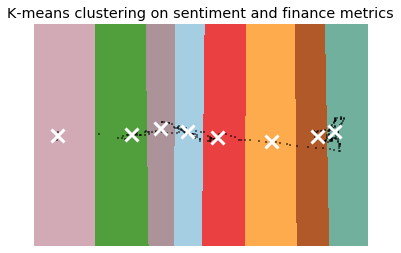

In [20]:
df = data_merged_window
df_num = df.select_dtypes(include=[sentisignal.np.float, sentisignal.np.int])
# print df_num.info()
df_num = df_num[['BULL_MINUS_BEAR', 'LOG_BULL_BEAR_RATIO', 'LOG_RETURN', 'VOLATILITY']]
# Convert DataFrame to matrix
mat = df_num.as_matrix()
# Using sklearn
km = sentisignal.KMeans()
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
# results = pandas.DataFrame([dataset.index,labels]).T

data = mat

reduced_data = sentisignal.PCA(n_components=2).fit_transform(data)
kmeans = sentisignal.KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = sentisignal.np.meshgrid(sentisignal.np.arange(x_min, x_max, h), sentisignal.np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(sentisignal.np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
sentisignal.plt.figure(1)
sentisignal.plt.clf()
sentisignal.plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=sentisignal.plt.cm.Paired,
           aspect='auto', origin='lower')

sentisignal.plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
sentisignal.plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
sentisignal.plt.title('K-means clustering on sentiment and finance metrics')
sentisignal.plt.xlim(x_min, x_max)
sentisignal.plt.ylim(y_min, y_max)
sentisignal.plt.xticks(())
sentisignal.plt.yticks(())
sentisignal.plt.show()
